In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import norm, skew #for some statistics


In [29]:
path = "C:/Users/15878/Documents/PythonScripts/Interview Screening Data_saved.xlsx"
df = pd.read_excel(path)
df.head()

,OPR_DATE,OPR_HOUR,LOCATION,TMP,ACTUAL_DEMAND
0,2017-01-01,1,Calgary,-8.9,9480.0
1,2017-01-01,2,Calgary,-10.0,9326.0
2,2017-01-01,3,Calgary,-10.0,9252.0
3,2017-01-01,4,Calgary,-10.0,9175.0
4,2017-01-01,5,Calgary,-11.1,9125.0


In [30]:
df.describe()

,OPR_HOUR,TMP,ACTUAL_DEMAND
count,17400.000000,17400.000000,17399.000000
mean,12.500000,4.849879,9584.142077
std,6.922385,11.946525,782.821579
min,1.000000,-30.000000,7600.000000
25%,6.750000,-2.800000,9048.000000
50%,12.500000,5.000000,9589.000000
75%,18.250000,13.900000,10174.500000
max,24.000000,36.100000,11697.000000


In [31]:
df.drop(['LOCATION' ], axis=1, inplace=True)
df.head()

,OPR_DATE,OPR_HOUR,TMP,ACTUAL_DEMAND
0,2017-01-01,1,-8.9,9480.0
1,2017-01-01,2,-10.0,9326.0
2,2017-01-01,3,-10.0,9252.0
3,2017-01-01,4,-10.0,9175.0
4,2017-01-01,5,-11.1,9125.0


In [32]:
 df.isnull().sum(axis = 0)

OPR_DATE         0
OPR_HOUR         0
TMP              0
ACTUAL_DEMAND    1
dtype: int64

In [33]:
df.dtypes

OPR_DATE         datetime64[ns]
OPR_HOUR                  int64
TMP                     float64
ACTUAL_DEMAND           float64
dtype: object

In [34]:
df.dropna(subset=['ACTUAL_DEMAND'],  inplace = True)

In [35]:
df.describe()

,OPR_HOUR,TMP,ACTUAL_DEMAND
count,17399.000000,17399.000000,17399.000000
mean,12.500603,4.850606,9584.142077
std,6.922127,11.946484,782.821579
min,1.000000,-30.000000,7600.000000
25%,7.000000,-2.800000,9048.000000
50%,13.000000,5.000000,9589.000000
75%,18.500000,13.900000,10174.500000
max,24.000000,36.100000,11697.000000


In [39]:
df['WEEKDAY']=df['OPR_DATE'].dt.weekday_name
df.head()
df['WEEKDAY'].unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

In [40]:
df['WEEKDAY'].replace(to_replace=['Sunday', 'Saturday'],value= 1,inplace=True)
df['WEEKDAY'].replace(to_replace=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],value= 0,inplace=True)
df['WEEKDAY'].unique()

array([1, 0], dtype=int64)

In [41]:
df['month_year'] = pd.to_datetime(df['OPR_DATE']).dt.to_period('M')
df.head()

,OPR_DATE,OPR_HOUR,TMP,ACTUAL_DEMAND,WEEKDAY,month_year
0,2017-01-01,1,-8.9,9480.0,1,2017-01
1,2017-01-01,2,-10.0,9326.0,1,2017-01
2,2017-01-01,3,-10.0,9252.0,1,2017-01
3,2017-01-01,4,-10.0,9175.0,1,2017-01
4,2017-01-01,5,-11.1,9125.0,1,2017-01


In [42]:
df['month']=pd.DatetimeIndex(df['OPR_DATE']).month
 

In [45]:
df.corr()

,OPR_HOUR,TMP,ACTUAL_DEMAND,WEEKDAY,month
OPR_HOUR,1.000000,0.150213,0.424348,0.000138,-0.000089
TMP,0.150213,1.000000,-0.337184,-0.008819,0.188826
ACTUAL_DEMAND,0.424348,-0.337184,1.000000,-0.179345,-0.007804
WEEKDAY,0.000138,-0.008819,-0.179345,1.000000,0.010754
month,-0.000089,0.188826,-0.007804,0.010754,1.000000


Skew is: -0.09088723084751026

 mu = 9584.14 and sigma = 782.80



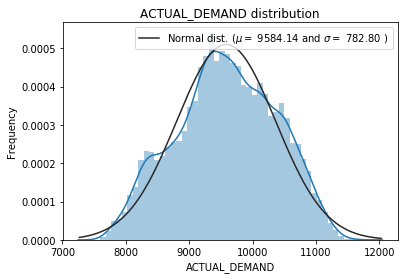

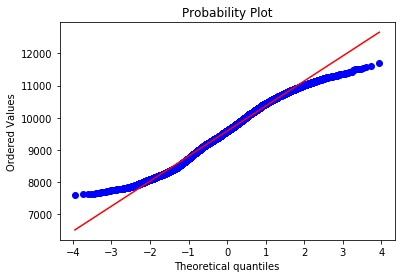

In [124]:
sns.distplot(df['ACTUAL_DEMAND'] , fit=norm );
print ("Skew is:", df.ACTUAL_DEMAND.skew())
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['ACTUAL_DEMAND'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('ACTUAL_DEMAND distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['ACTUAL_DEMAND'], plot=plt)
plt.show()

Skew is: -0.2510844232383353

 mu = 4.85 and sigma = 11.95



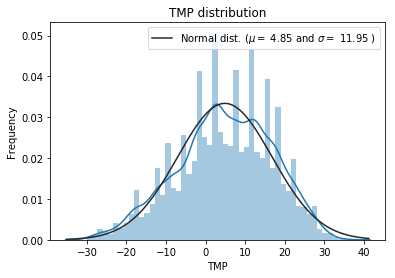

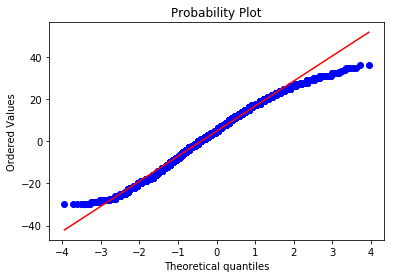

In [123]:
sns.distplot(df['TMP'] , fit=norm);
print ("Skew is:", df.TMP.skew())
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['TMP'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('TMP distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['TMP'], plot=plt)
plt.show()

Skew is: -6.094340443466252e-05


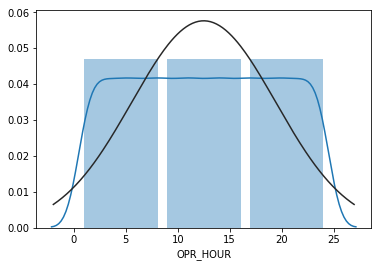

In [125]:
sns.distplot(df['OPR_HOUR'] , fit=norm);
print ("Skew is:", df.OPR_HOUR.skew())

Skew is: 0.9500570284408412


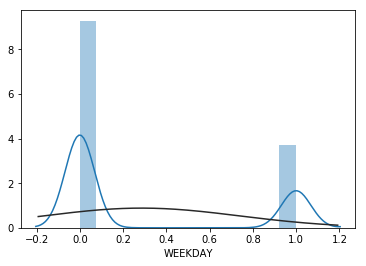

In [126]:
sns.distplot(df['WEEKDAY'] , fit=norm);
print ("Skew is:", df.WEEKDAY.skew())

Skew is: -0.006631688426988938


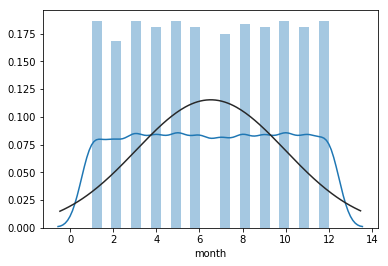

In [127]:
sns.distplot(df['month'] , fit=norm);
print ("Skew is:", df.month.skew())

Skew is: -0.09088723084751026


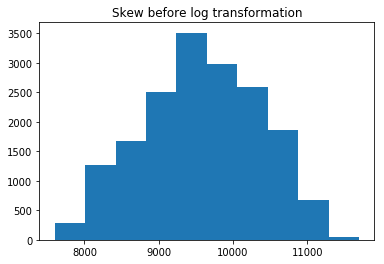

In [36]:

# Determining the Skewness of data 
print ("Skew is:", df.ACTUAL_DEMAND.skew())

plt.hist(df.ACTUAL_DEMAND)
plt.title("Skew before log transformation")
plt.show()

# After log transformation of the data it looks much more center aligned
#df['Skewed_AD'] = np.log(df['ACTUAL_DEMAND']+1)
#print ("Skew after log transformation is:", df['Skewed_AD'].skew())
#plt.hist(df['Skewed_AD'], color='blue')
#plt.title("Skew after log transformation")
#plt.show()

In [37]:
x = df['TMP']
y = df['ACTUAL_DEMAND']

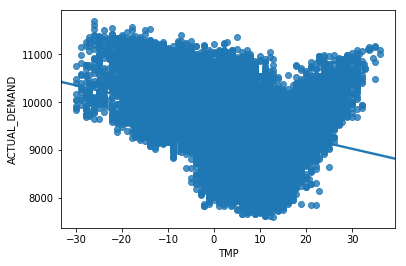

In [38]:
sns.regplot(x ,y ,data=df)

In [43]:
df.head()

,OPR_DATE,OPR_HOUR,TMP,ACTUAL_DEMAND,WEEKDAY,month_year,month
0,2017-01-01,1,-8.9,9480.0,1,2017-01,1
1,2017-01-01,2,-10.0,9326.0,1,2017-01,1
2,2017-01-01,3,-10.0,9252.0,1,2017-01,1
3,2017-01-01,4,-10.0,9175.0,1,2017-01,1
4,2017-01-01,5,-11.1,9125.0,1,2017-01,1


In [46]:
dftest=df[(df.month_year=='2018-07')   ]
dftest.shape

(744, 7)

In [72]:
dftrain=df[(df.month_year !='2018-07')   ]
#dftrain=dftrain[(dftrain.month >=3) & (dftrain.month <=11)]
dftrain.shape

(16655, 7)

# normilize observed data


Skew is: -0.2510844232383353


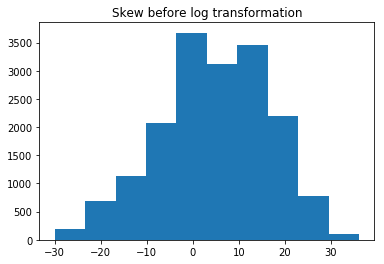

In [108]:
# Determining the Skewness of data 
print ("Skew is:", df.TMP.skew())

plt.hist(df.TMP)
plt.title("Skew before log transformation")
plt.show()

In [110]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics



 mu = 9584.14 and sigma = 782.80



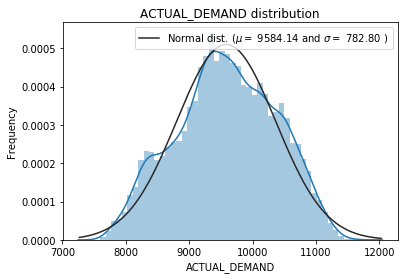

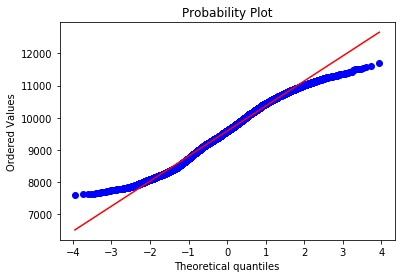

In [111]:
sns.distplot(df['ACTUAL_DEMAND'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['ACTUAL_DEMAND'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('ACTUAL_DEMAND distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['ACTUAL_DEMAND'], plot=plt)
plt.show()

# GradientBoostingRegressor

In [73]:

from sklearn import linear_model
from sklearn import ensemble

#lr =  ensemble.RandomForestRegressor(n_estimators = 100, oob_score = True, n_jobs = -1,random_state =50,max_features = "sqrt", min_samples_leaf = 50)
#lr = linear_model.LinearRegression()
lr = ensemble.GradientBoostingRegressor()
#lr = linear_model.TheilSenRegressor()
#lr = linear_model.RANSACRegressor(random_state=50)


In [96]:
x_train=dftrain[['TMP','WEEKDAY', 'OPR_HOUR' ,'month']]
y_train=dftrain['ACTUAL_DEMAND']
#y_train = np.log(y_train )
x_test=dftest[['TMP','WEEKDAY',  'OPR_HOUR' ,'month' ]]
y_test=dftest['ACTUAL_DEMAND']
#y_test= np.log(y_test)

In [97]:

model = lr.fit(x_train, y_train)
model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [98]:
model.feature_importances_
 
 

array([0.3138234 , 0.03781135, 0.42771867, 0.22064657])

In [99]:
print ("R^2 is: \n", model.score(x_test, y_test))

R^2 is: 
 0.7634558864021559


In [100]:
print ("R^2 is: \n", model.score(x_train, y_train))

R^2 is: 
 0.8996954308986289


In [101]:
predictions = model.predict(x_test)
predictions.shape
 

(744,)

In [102]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 127732.45581568682


Text(0.5, 1.0, 'Gradient Boosting Regression Model')

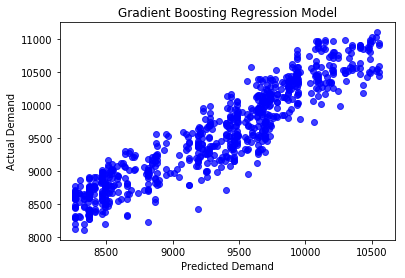

In [103]:
actual_values = y_test
plt.scatter(predictions,  actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Demand')
plt.ylabel('Actual Demand')
plt.title('Gradient Boosting Regression Model')
#pltrandom_state=None.show()

In [104]:
dftest['prediction']=predictions
submission=dftest.groupby(['OPR_DATE']).mean()
submission['error']=(submission['prediction']-submission['ACTUAL_DEMAND'])/submission['ACTUAL_DEMAND']
submission.head( )

submission.to_csv(r'C:\Users\15878\Documents\prediction.csv')


D:\Anacoda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


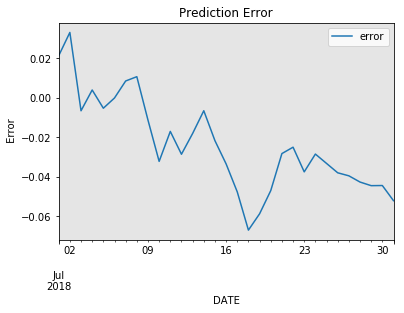

In [105]:
submission['error'].plot()
plt.title('Prediction Error')
ax = plt.gca()
ax.set_facecolor((0.898, 0.898, 0.898))
fig = plt.gcf()
plt.xlabel('DATE')
plt.ylabel(' Error')
plt.legend()

plt.show()
plt.close()

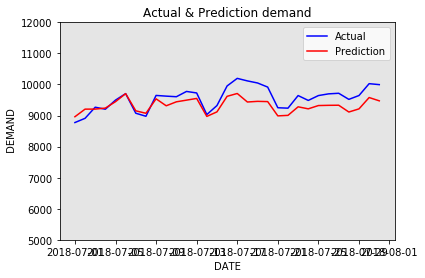

In [106]:
     
y1=submission['ACTUAL_DEMAND']
y2=submission['prediction']
plt.plot(  y1, '-b',  label='Actual' )
plt.plot(  y2, '-r',  label='Prediction')
plt.title('Actual & Prediction demand')
ax = plt.gca()
ax.set_facecolor((0.898, 0.898, 0.898))
plt.legend( )

fig = plt.gcf()
plt.xlabel('DATE')
plt.ylabel(' DEMAND')
plt.ylim(5000, 12000)
plt.show()
plt.close()

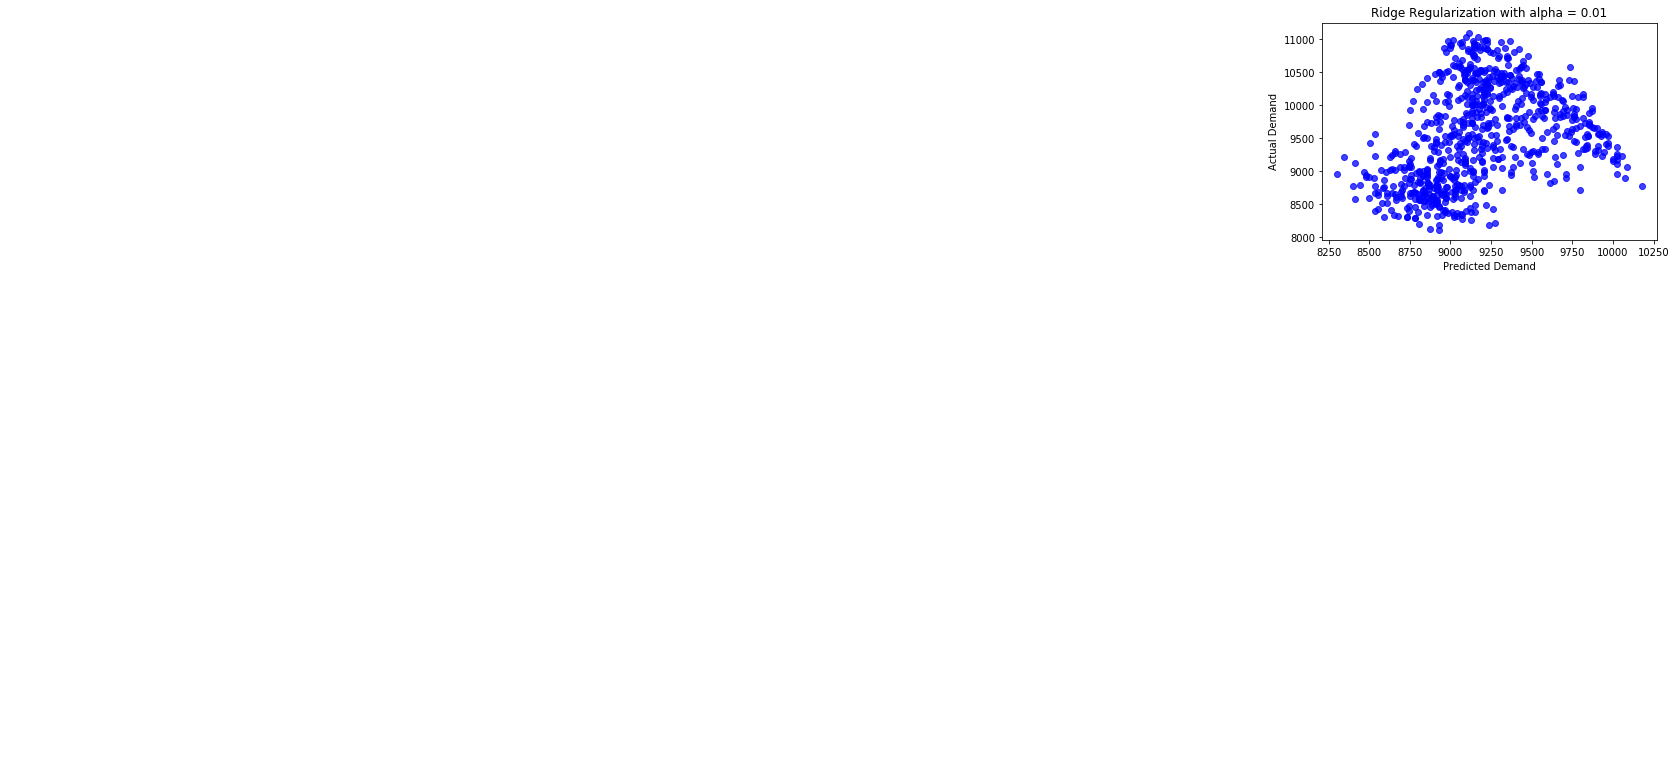

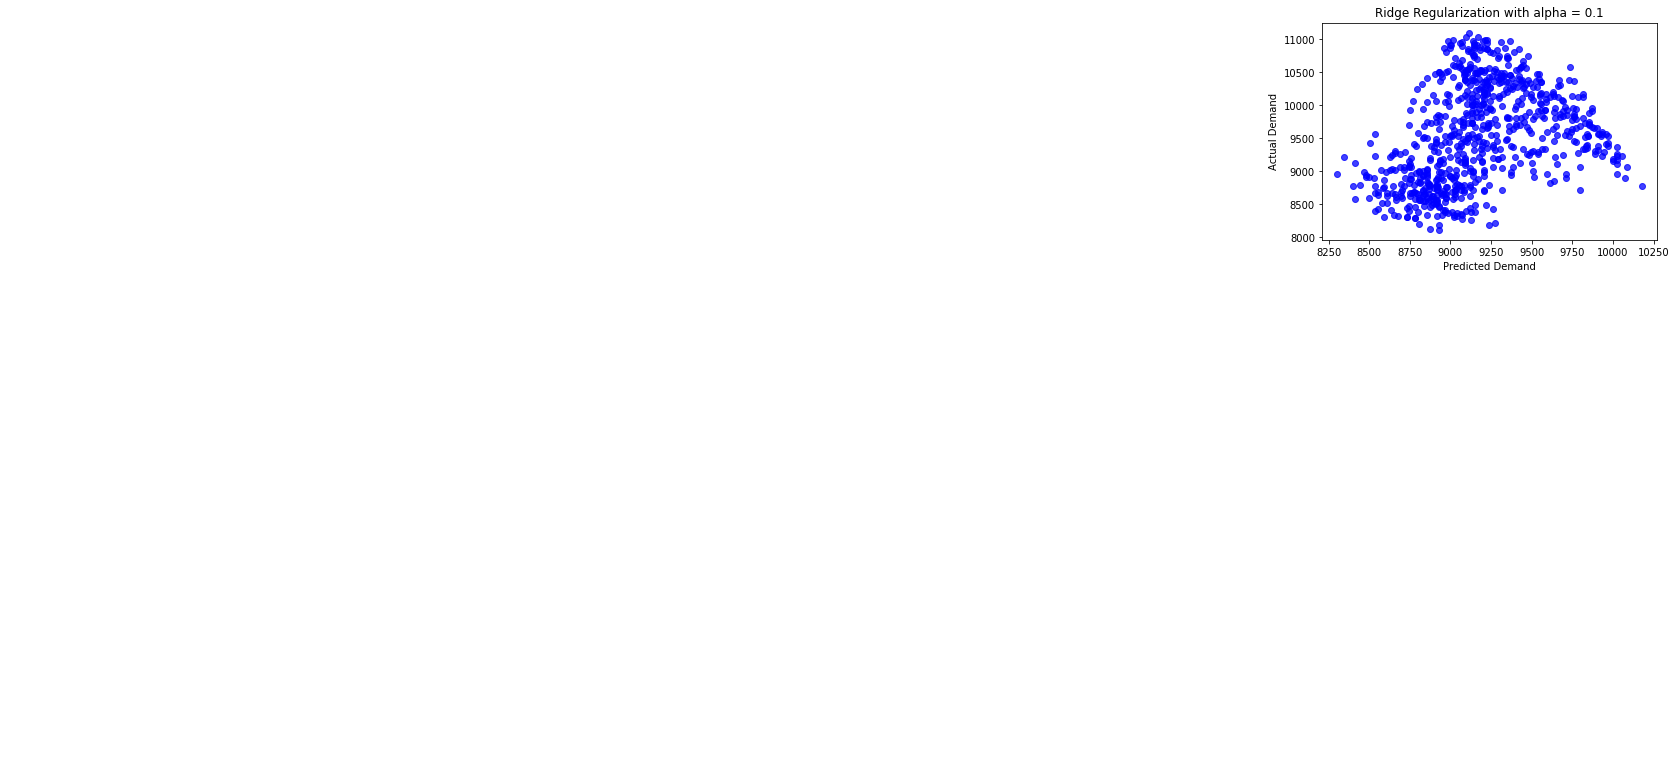

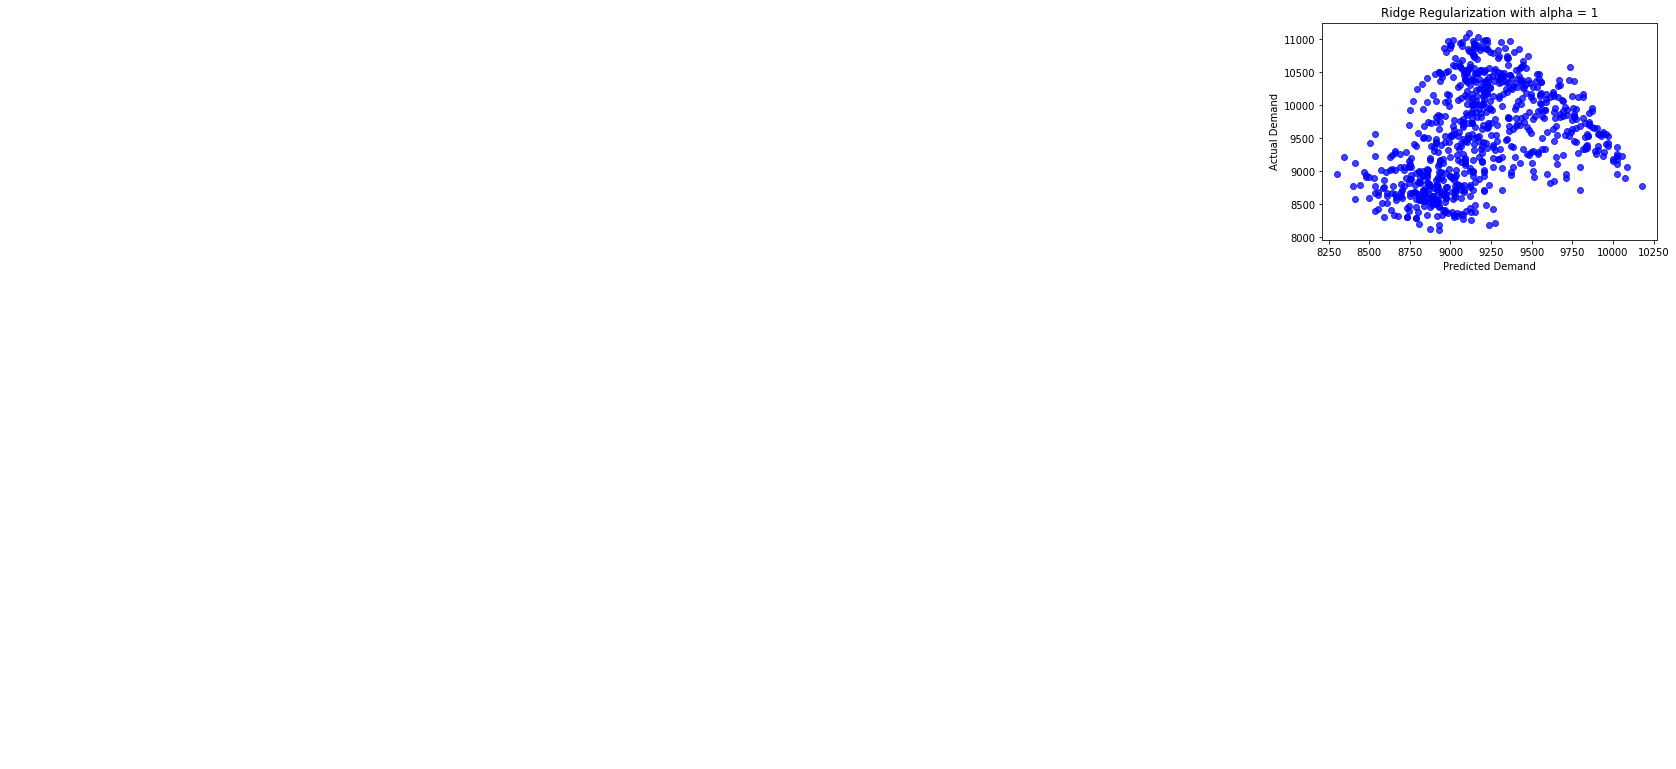

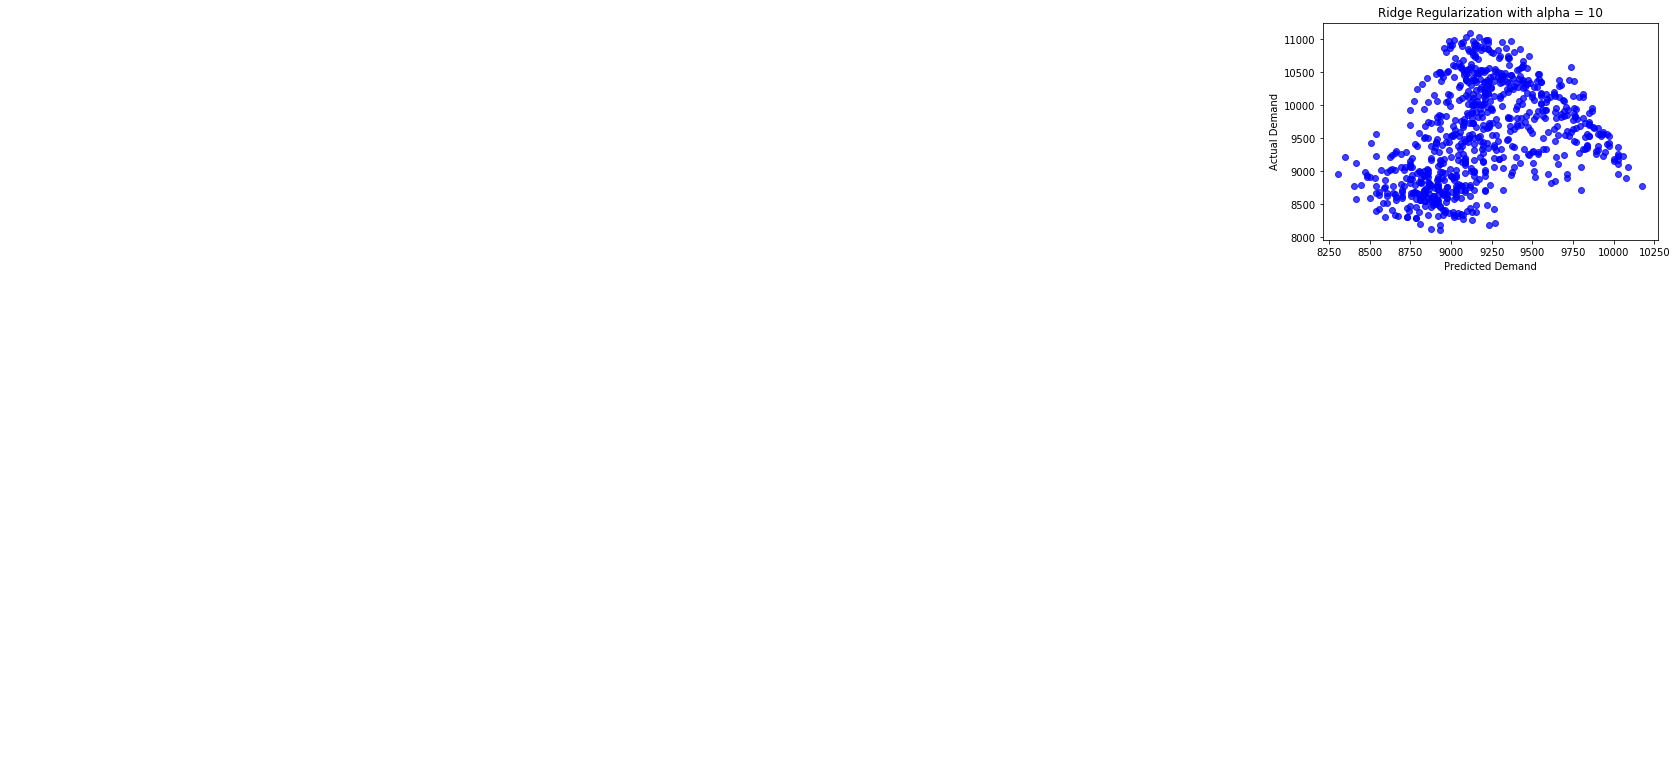

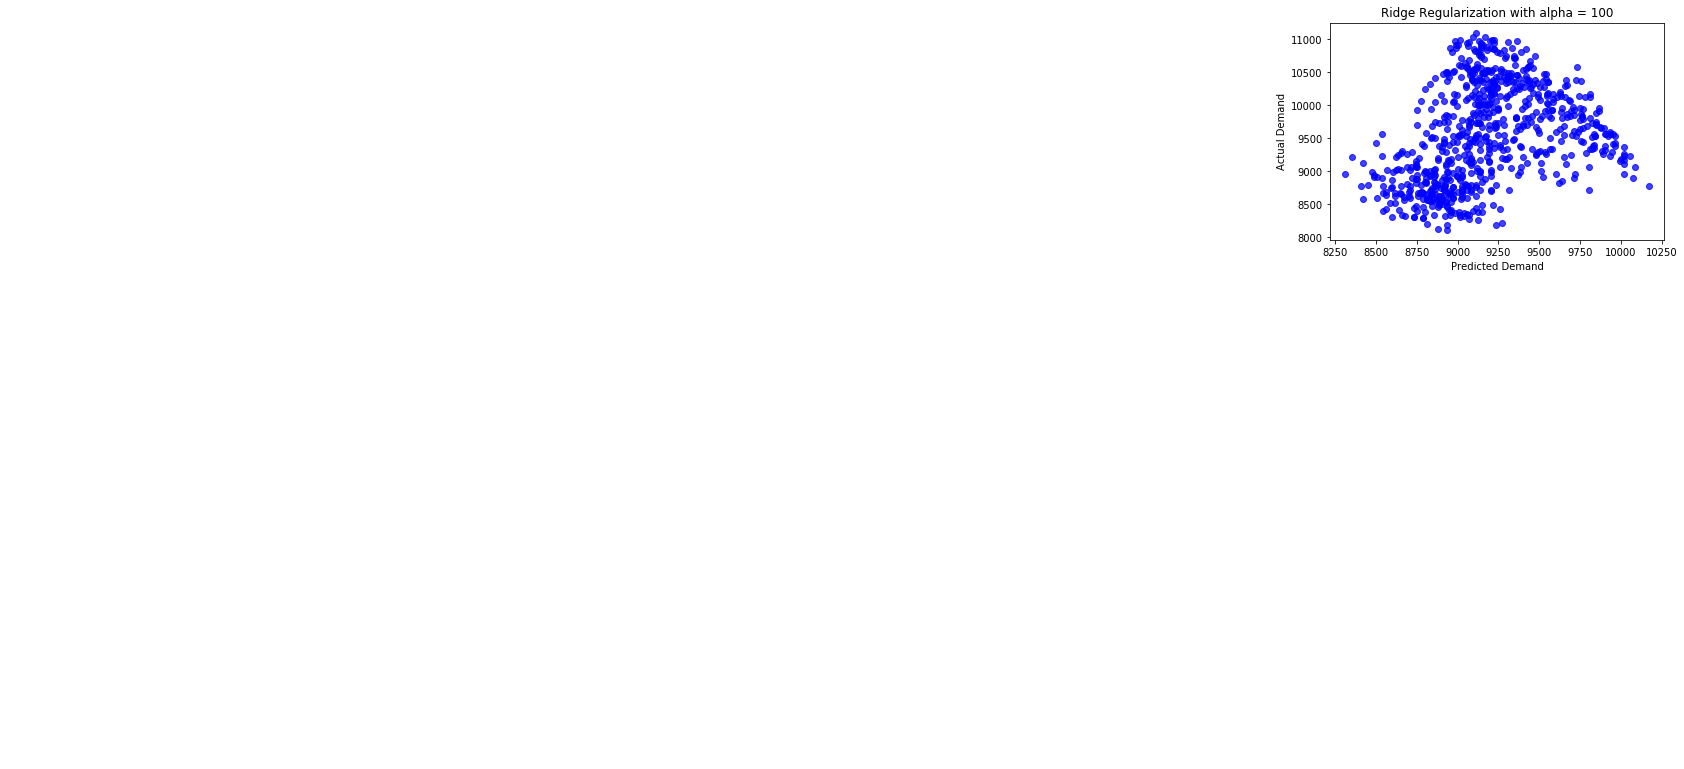

In [107]:
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(x_train, y_train)
    preds_ridge = ridge_model.predict(x_test)
    
    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Demand')
    plt.ylabel('Actual Demand')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(x_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(121,106),size='x-large')
    plt.show()

# simple linear regression


In [39]:
dftrain=df[(df.month_year !='2018-07')   ]
#dftrain=dftrain[(dftrain.month >=3) & (dftrain.month <=11)]
dftrain.shape

(16655, 6)

In [40]:
dftrain.shape
 


(16655, 6)

In [41]:
dftest.shape

(744, 6)

In [42]:
dftrain_end=dftrain[(dftrain.WEEKDAY==1)  ]
dftrain_weekday=dftrain[(dftrain.WEEKDAY==0) ]
dftest_end=dftest[(dftest.WEEKDAY==1)  ]
dftest_weekday=dftest[(dftest.WEEKDAY==0) ]

In [43]:
x_train_w = dftrain_weekday['TMP']
y_train_w = dftrain_weekday['ACTUAL_DEMAND']
x_test_w=dftest_weekday['TMP']
y_test_w=dftest_weekday['ACTUAL_DEMAND']

In [44]:
x_train_e = dftrain_end['TMP']
y_train_e = dftrain_end['ACTUAL_DEMAND']
x_test_e=dftest_end['TMP']
y_test_e=dftest_end['ACTUAL_DEMAND']

In [45]:
f = np.polyfit(x_train_w, y_train_w, 5)
p = np.poly1d(f)
print(p)


            5             4          3          2
-7.993e-05 x + 0.0007473 x + 0.1456 x + 0.4472 x - 68.99 x + 9690


In [47]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(-30, 35, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for ACTUAL DEMAND ~ TMP')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel('TMP')
    plt.ylabel('ACTUAL_DEMAND')

    plt.show()
    plt.close()

In [52]:
p(x_test_w)
dftest_weekday['prediction']=p(x_test_w)
dftest_weekday.head()


C:\Users\15878\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,OPR_DATE,TMP,ACTUAL_DEMAND,WEEKDAY,month_year,month,prediction
13008,2018-07-02,11.1,8545.0,0,2018-07,7,9176.133324
13009,2018-07-02,8.9,8419.0,0,2018-07,7,9214.139362
13010,2018-07-02,8.9,8312.0,0,2018-07,7,9214.139362
13011,2018-07-02,8.9,8277.0,0,2018-07,7,9214.139362
13012,2018-07-02,8.9,8265.0,0,2018-07,7,9214.139362


In [58]:
submission1=dftest_weekday.groupby(['OPR_DATE']).mean()
submission1.head()
submission1['error']=(submission1['prediction']-submission1['ACTUAL_DEMAND'])/submission1['ACTUAL_DEMAND']
 
submission1.head()
submission1.to_csv(r'C:\Users\15878\Documents\prediction_seperated.csv')


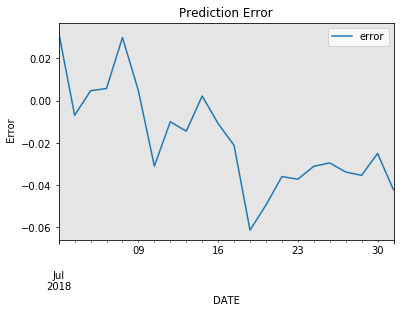

In [59]:
submission1['error'].plot()
plt.title('Prediction Error')
ax = plt.gca()
ax.set_facecolor((0.898, 0.898, 0.898))
fig = plt.gcf()
plt.xlabel('DATE')
plt.ylabel(' Error')
plt.legend()

plt.show()
plt.close()

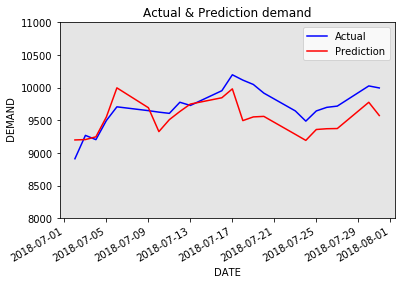

In [61]:
y1=submission1['ACTUAL_DEMAND']
y2=submission1['prediction']
plt.plot(  y1, '-b',  label='Actual' )
plt.plot(  y2, '-r',  label='Prediction')
plt.title('Actual & Prediction demand')
ax = plt.gca()
ax.set_facecolor((0.898, 0.898, 0.898))
plt.legend( )

fig = plt.gcf()
plt.xlabel('DATE')
plt.ylabel(' DEMAND')
plt.ylim(8000, 11000)
fig.autofmt_xdate()
plt.show()
plt.close()


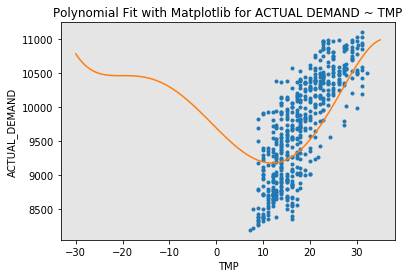

In [49]:
PlotPolly(p, x_test_w, y_test_w, 'TMP-demand')

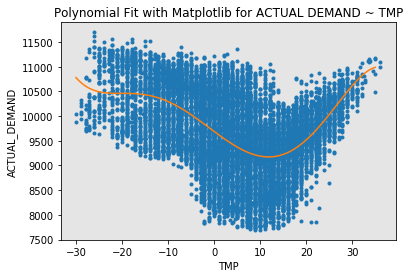

In [50]:
PlotPolly(p, x_train_w, y_train_w, 'TMP-demand')

# for weekend


In [107]:
f = np.polyfit(x_train_e, y_train_e, 5)
p = np.poly1d(f)
print(p)  


            5            4          3             2
-0.0001009 x + 0.001291 x + 0.1537 x + 0.0001391 x - 71.31 x + 9447


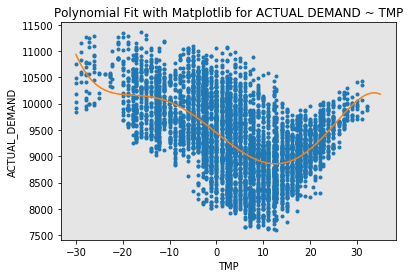

In [108]:
PlotPolly(p, x_train_e, y_train_e, 'TMP-demand')

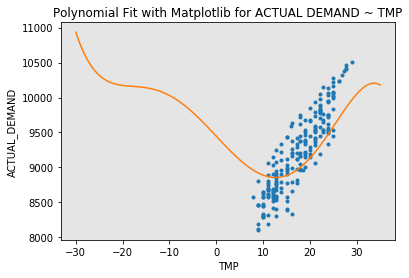

In [109]:
PlotPolly(p, x_test_e, y_test_e, 'TMP-demand')

In [110]:
p(x_test_e)
dftest_end['prediction']=p(x_test_e)
dftest_end.head()

C:\Users\15878\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,OPR_DATE,TMP,ACTUAL_DEMAND,WEEKDAY,month_year,month,prediction
12984,2018-07-01,12.2,8589.0,1,2018-07,7,8857.217183
12985,2018-07-01,12.2,8426.0,1,2018-07,7,8857.217183
12986,2018-07-01,10.0,8321.0,1,2018-07,7,8890.196799
12987,2018-07-01,10.0,8311.0,1,2018-07,7,8890.196799
12988,2018-07-01,10.0,8294.0,1,2018-07,7,8890.196799


In [115]:
submission2=dftest_end.groupby(['OPR_DATE']).mean()
submission2.head()
submission2['error']=(submission2['prediction']-submission2['ACTUAL_DEMAND'])/submission2['ACTUAL_DEMAND']
 
submission2.head(20)
#submission2.to_csv(r'C:\Users\15878\Documents\prediction_seperated_weekend.csv')

,TMP,ACTUAL_DEMAND,WEEKDAY,month,prediction,error
OPR_DATE,,,,,,
2018-07-01,14.354167,8774.750000,1,7,8934.868961,0.018248
2018-07-07,19.916667,9074.541667,1,7,9181.846825,0.011825
2018-07-08,17.229167,8976.666667,1,7,9095.611696,0.013250
2018-07-14,14.675000,9031.750000,1,7,8973.891373,-0.006406
2018-07-15,18.312500,9321.375000,1,7,9180.663131,-0.015096
2018-07-21,15.645833,9251.375000,1,7,8989.530994,-0.028303
2018-07-22,16.612500,9237.500000,1,7,9010.424969,-0.024582
2018-07-28,18.404167,9520.916667,1,7,9170.009947,-0.036856
2018-07-29,20.770833,9644.833333,1,7,9326.064773,-0.033051


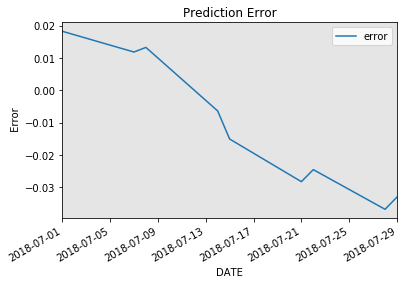

In [126]:
submission2['error'].plot()
plt.title('Prediction Error')
ax = plt.gca()
ax.set_facecolor((0.898, 0.898, 0.898))
fig = plt.gcf()
plt.xlabel('DATE')
plt.ylabel(' Error')
plt.legend()

plt.show()
plt.close()

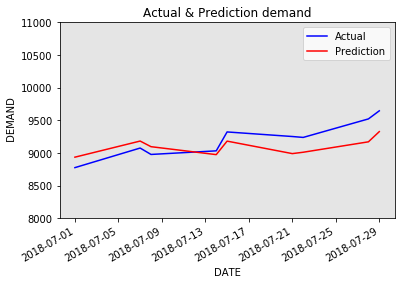

In [118]:
y1=submission2['ACTUAL_DEMAND']
y2=submission2['prediction']
plt.plot(  y1, '-b',  label='Actual' )
plt.plot(  y2, '-r',  label='Prediction')
plt.title('Actual & Prediction demand')
ax = plt.gca()
ax.set_facecolor((0.898, 0.898, 0.898))
plt.legend( )

fig = plt.gcf()
plt.xlabel('DATE')
plt.ylabel(' DEMAND')
plt.ylim(8000, 11000)
fig.autofmt_xdate()
plt.show()
plt.close()

In [119]:
submission1.head()

,TMP,ACTUAL_DEMAND,WEEKDAY,month,prediction,error
OPR_DATE,,,,,,
2018-07-02,10.629167,8910.791667,0,7,9198.754791,0.032316
2018-07-03,11.025000,9268.708333,0,7,9204.389544,-0.006939
2018-07-04,13.841667,9203.500000,0,7,9246.735200,0.004698
2018-07-05,18.333333,9496.875000,0,7,9551.659313,0.005769
2018-07-06,23.991667,9706.125000,0,7,9996.613352,0.029928


In [120]:
submission2.head()

,TMP,ACTUAL_DEMAND,WEEKDAY,month,prediction,error
OPR_DATE,,,,,,
2018-07-01,14.354167,8774.750000,1,7,8934.868961,0.018248
2018-07-07,19.916667,9074.541667,1,7,9181.846825,0.011825
2018-07-08,17.229167,8976.666667,1,7,9095.611696,0.013250
2018-07-14,14.675000,9031.750000,1,7,8973.891373,-0.006406
2018-07-15,18.312500,9321.375000,1,7,9180.663131,-0.015096


In [130]:
submission_final = submission1.append(submission2 )
#submission_final.head(31)
submission_final=submission_final.sort_values(by=['OPR_DATE'])
submission_final.head(31)

,TMP,ACTUAL_DEMAND,WEEKDAY,month,prediction,error
OPR_DATE,,,,,,
2018-07-01,14.354167,8774.750000,1,7,8934.868961,0.018248
2018-07-02,10.629167,8910.791667,0,7,9198.754791,0.032316
2018-07-03,11.025000,9268.708333,0,7,9204.389544,-0.006939
2018-07-04,13.841667,9203.500000,0,7,9246.735200,0.004698
2018-07-05,18.333333,9496.875000,0,7,9551.659313,0.005769
2018-07-06,23.991667,9706.125000,0,7,9996.613352,0.029928
2018-07-07,19.916667,9074.541667,1,7,9181.846825,0.011825
2018-07-08,17.229167,8976.666667,1,7,9095.611696,0.013250
2018-07-09,20.595833,9647.583333,0,7,9692.513626,0.004657


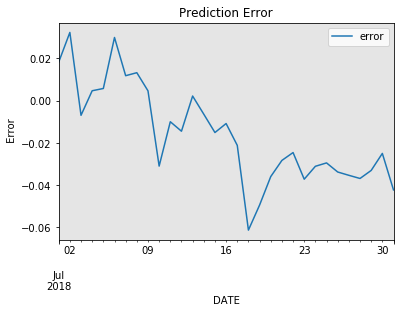

In [131]:
submission_final['error'].plot()
plt.title('Prediction Error')
ax = plt.gca()
ax.set_facecolor((0.898, 0.898, 0.898))
fig = plt.gcf()
plt.xlabel('DATE')
plt.ylabel(' Error')
plt.legend()

plt.show()
plt.close()

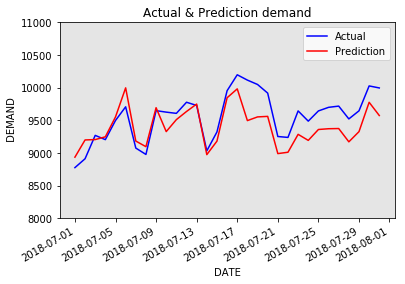

In [132]:
y1=submission_final['ACTUAL_DEMAND']
y2=submission_final['prediction']
plt.plot(  y1, '-b',  label='Actual' )
plt.plot(  y2, '-r',  label='Prediction')
plt.title('Actual & Prediction demand')
ax = plt.gca()
ax.set_facecolor((0.898, 0.898, 0.898))
plt.legend( )

fig = plt.gcf()
plt.xlabel('DATE')
plt.ylabel(' DEMAND')
plt.ylim(8000, 11000)
fig.autofmt_xdate()
plt.show()
plt.close()

In [134]:
submission_final.to_csv(r'C:\Users\15878\Documents\prediction_seperated_final.csv')

In [145]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

NameError: name 'predictions' is not defined

In [148]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test_w, p(x_test_w))
print('The R-square value is: ', r_squared)

The R-square value is:  -0.09131063117465343


In [147]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test_e, p(x_test_e))
print('The R-square value is: ', r_squared)

The R-square value is:  0.5446775516135112


In [300]:
r_squared = r2_score(y_train_w, p(x_train_w))
print('The R-square value is: ', r_squared)

The R-square value is:  0.30612955592712454


In [151]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test_w, p(x_test_w))
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  609076.484164


In [308]:
f = np.polyfit(x_train_e, y_train_e, 5)
p = np.poly1d(f)
print(p)

            5            4          3             2
-0.0001009 x + 0.001291 x + 0.1537 x + 0.0001391 x - 71.31 x + 9447


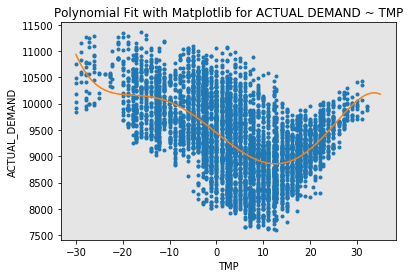

In [309]:
PlotPolly(p, x_train_e, y_train_e, 'TMP-demand')

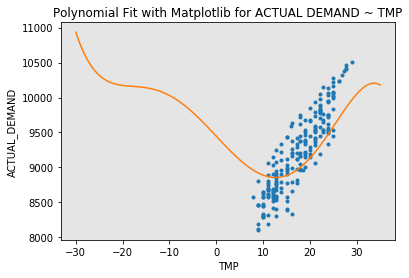

In [310]:
PlotPolly(p, x_test_e, y_test_e, 'TMP-demand')

In [311]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test_e, p(x_test_e))
print('The R-square value is: ', r_squared)

The R-square value is:  0.5446775516135112


In [312]:
r_squared = r2_score(y_train_e, p(x_train_e))
print('The R-square value is: ', r_squared)

The R-square value is:  0.37335183020840224


In [313]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test_e, p(x_test_e))
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  145995.90310887233


In [314]:
dftrain.head()

,OPR_DATE,TMP,ACTUAL_DEMAND,WEEKDAY,month_year,Skewed_AD
0,2017-01-01,-8.9,9480.0,1,2017-01,9.157045
1,2017-01-01,-10.0,9326.0,1,2017-01,9.140669
2,2017-01-01,-10.0,9252.0,1,2017-01,9.132703
3,2017-01-01,-10.0,9175.0,1,2017-01,9.124347
4,2017-01-01,-11.1,9125.0,1,2017-01,9.118883


# retrieve some data in summer


In [399]:
dftrain_weekday1=dftrain_weekday[ (dftrain_weekday.month_year=='2017-06')|(dftrain_weekday.month_year=='2017-07') 
                                 |(dftrain_weekday.month_year=='2017-08')|(dftrain_weekday.month_year=='2017-09')
                                |(dftrain_weekday.month_year=='2018-06')|(dftrain_weekday.month_year=='2018-08')
                                |(dftrain_weekday.month_year=='2018-09')]
 

In [400]:
x_train_w1 = dftrain_weekday1['TMP']
y_train_w1 = dftrain_weekday1['ACTUAL_DEMAND']
x_test_w=dftest_weekday['TMP']
y_test_w=dftest_weekday['ACTUAL_DEMAND']

In [420]:
f = np.polyfit(x_train_w1, y_train_w1,5)
p = np.poly1d(f)
print(p)


          5           4         3         2
0.001094 x - 0.09274 x + 2.596 x - 22.77 x + 1.913 x + 9315


In [421]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(5, 35, 1000)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for ACTUAL DEMAND ~ TMP')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel('TMP')
    plt.ylabel('ACTUAL_DEMAND')

    plt.show()
    plt.close()

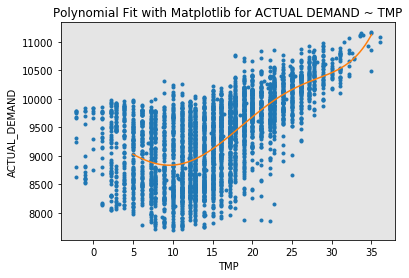

In [422]:
PlotPolly(p, x_train_w1, y_train_w1, 'TMP-demand')

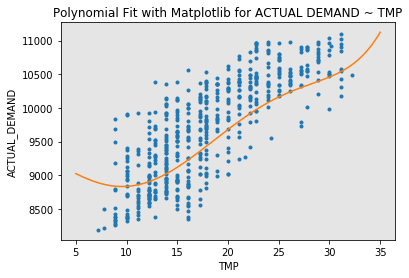

In [423]:
PlotPolly(p, x_test_w, y_test_w, 'TMP-demand')

In [424]:
r_squared = r2_score(y_train_w1, p(x_train_w1))
print('The train R-square value is: ', r_squared)

The train R-square value is:  0.4719269724895756


In [425]:
r_squared = r2_score(y_test_w, p(x_test_w))
print('The testR-square value is: ', r_squared)

The testR-square value is:  0.5413054952466181


In [426]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train_w1, p(x_train_w1))
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  264324.5484330917


In [428]:
from sklearn import ensemble
lr = ensemble.GradientBoostingRegressor()

In [429]:
model = lr.fit(x_train_w1, y_train_w1)

ValueError: Expected 2D array, got 1D array instead:
array=[18.9 17.8 16.1 ...  3.9  3.9  3.9].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# Normalization


In [264]:
x_train_w_n= dftrain_weekday['TMP']/dftrain_weekday['TMP'].max()
y_train_w_n = dftrain_weekday['ACTUAL_DEMAND']/dftrain_weekday['ACTUAL_DEMAND'].max()
x_test_w_n=dftest_weekday['TMP']/dftest_weekday['TMP'].max()
y_test_w_n=dftest_weekday['ACTUAL_DEMAND']/dftest_weekday['ACTUAL_DEMAND'].max()


In [265]:
f = np.polyfit(x_train_w_n, y_train_w_n, 5)
p = np.poly1d(f)
print(p)

        5          4          3           2
-0.419 x + 0.1085 x + 0.5854 x + 0.04983 x - 0.2129 x + 0.8284


In [268]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(-1, 1, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for ACTUAL DEMAND ~ TMP')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel('TMP')
    plt.ylabel('ACTUAL_DEMAND')

    plt.show()
    plt.close()

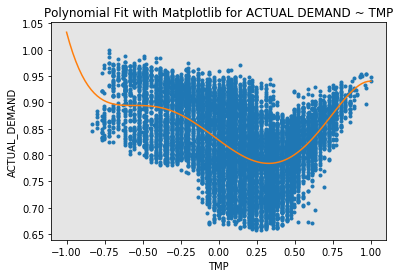

In [269]:
PlotPolly(p, x_train_w_n, y_train_w_n, 'TMP-demand')

In [267]:
r_squared = r2_score(y_test_w_n, p(x_test_w_n))
print('The R-square value is: ', r_squared)

The R-square value is:  0.10677801167622913


# log regression


In [270]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train_w,y_train_w)
predictions = logmodel.predict(x_test_w)

C:\Users\15878\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Expected 2D array, got 1D array instead:
array=[-18.9 -20.  -18.9 ... -12.2 -10.  -10. ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### old version


In [174]:
#import datetime
df['WEEKDAY']=df['OPR_DATE'].dt.weekday_name
df.head( )
 

,OPR_DATE,TMP,ACTUAL_DEMAND,month_year,WEEKDAY
0,2017-01-01,-8.9,9480.0,2017-01,Sunday
1,2017-01-01,-10.0,9326.0,2017-01,Sunday
2,2017-01-01,-10.0,9252.0,2017-01,Sunday
3,2017-01-01,-10.0,9175.0,2017-01,Sunday
4,2017-01-01,-11.1,9125.0,2017-01,Sunday
5,2017-01-01,-12.2,9144.0,2017-01,Sunday
6,2017-01-01,-12.2,9202.0,2017-01,Sunday
7,2017-01-01,-12.2,9363.0,2017-01,Sunday
8,2017-01-01,-12.2,9550.0,2017-01,Sunday
9,2017-01-01,-12.2,9641.0,2017-01,Sunday


In [125]:
dfweekend=df[(df.WEEKDAY=='Sunday') | (df.WEEKDAY=='Saturday') ]
dfweekday=df[~df["WEEKDAY"].isin(["Sunday" , "Saturday"])]
 
             

In [120]:
dfweekend.shape
 

(4967, 7)

In [126]:
dfweekday.shape

(12432, 7)

In [135]:
xweekday = dfweekday['TMP']
yweekday = dfweekday['ACTUAL_DEMAND']

In [140]:
f = np.polyfit(xweekday, yweekday, 5)
p = np.poly1d(f)
print(p)

            5             4          3         2
-9.257e-05 x + 0.0007579 x + 0.1583 x + 0.496 x - 70.7 x + 9686


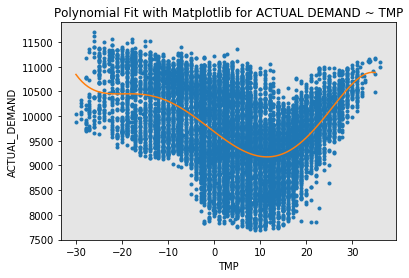

In [141]:
PlotPolly(p, xweekday, yweekday, 'TMP-DEMAND')

In [142]:
xweekend = dfweekend['TMP']
yweekend = dfweekend['ACTUAL_DEMAND']

In [149]:
f = np.polyfit(xweekend, yweekend, 4)
p = np.poly1d(f)
print(p)

           4           3          2
0.0007512 x + 0.06813 x + 0.4614 x - 58.72 x + 9412


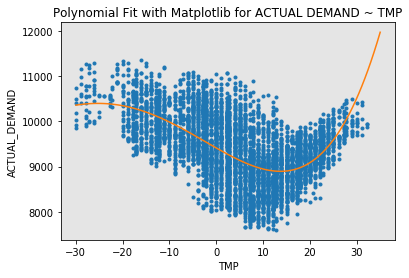

In [150]:
PlotPolly(p, xweekend, yweekend, 'TMP-DEMAND')

In [151]:
df.head()

,OPR_DATE,OPR_HOUR,LOCATION,TMP,ACTUAL_DEMAND,day_of_date,WEEKDAY
0,2017-01-01,1,Calgary,-8.9,9480.0,1,Sunday
1,2017-01-01,2,Calgary,-10.0,9326.0,1,Sunday
2,2017-01-01,3,Calgary,-10.0,9252.0,1,Sunday
3,2017-01-01,4,Calgary,-10.0,9175.0,1,Sunday
4,2017-01-01,5,Calgary,-11.1,9125.0,1,Sunday


In [171]:
df['month_year'] = pd.to_datetime(df['OPR_DATE']).dt.to_period('M')
df.head()

,OPR_DATE,TMP,ACTUAL_DEMAND,month_year
0,2017-01-01,-8.9,9480.0,2017-01
1,2017-01-01,-10.0,9326.0,2017-01
2,2017-01-01,-10.0,9252.0,2017-01
3,2017-01-01,-10.0,9175.0,2017-01
4,2017-01-01,-11.1,9125.0,2017-01


In [172]:
dftest=df[(df.month_year=='2018-07')   ]
dftest.shape

(744, 4)

In [173]:
dftrain=df[(df.month_year !='2018-07')   ]
dftrain.shape

(16656, 4)